In [1]:
!python --version


Python 3.11.8


In [33]:
# !pip install --upgrade pip


In [30]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [31]:
pip install np_utils

Note: you may need to restart the kernel to use updated packages.


In [32]:
# pip install opencv-python


In [43]:
#from keras.utils import np_utils
#from tensorflow.keras.utils import to_categorical
#from tensorflow.python.keras.utils import np_utils


In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization,Dense,SeparableConv2D,MaxPooling2D,Activation,Flatten,Dropout


In [2]:
INIT_LR = 0.1
BATCH_SIZE = 64
NUM_EPOCHS = 50
lr_find = True
classes = ['Non_Fire','Fire']

In [3]:
images = []
labels = []
# f'C:/Users/Hp/Documents/Image dataset/'+c
for c in classes:
    try:
        for img in os.listdir('Image Dataset/'+c):
            img = cv2.imread('Image Dataset/'+c+'/'+img)
            
            img = cv2.resize(img,(128,128))
            images.append(img)
            labels.append([0,1][c=='Fire'])
    except:
        pass
    
images = np.array(images,dtype='float32')/255.

In [4]:
print(f"Loaded {len(images)} images")

Loaded 4127 images


In [5]:
ind = np.random.randint(0,len(images))
cv2.imshow(str(labels[ind]),images[ind])
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
labels = np.array(labels)
labels = np_utils.to_categorical(labels,num_classes=2)

In [7]:
d = {}

classTotals = labels.sum(axis=0)
classWeight = classTotals.max() / classTotals

d[0] = classWeight[0]
d[1] = classWeight[1]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.25, shuffle=True, random_state=42)

In [9]:
aug = ImageDataGenerator(
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

In [10]:
model = Sequential()

# CONV => RELU => POOL
model.add(SeparableConv2D(16,(7,7),padding='same',input_shape=(128,128,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# CONV => RELU => POOL
model.add(SeparableConv2D(32,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# CONV => RELU => CONV => RELU => POOL
model.add(SeparableConv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(SeparableConv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# first set of FC => RELU layers
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


# second set of FC => RELU layers
model.add(Dense(128))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# softmax classifier
model.add(Dense(len(classes)))
model.add(Activation("softmax"))

# Remove the 'decay' argument
opt = SGD(learning_rate=INIT_LR, momentum=0.9)


model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

print(model.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 separable_conv2d (Separabl  (None, 128, 128, 16)      211       
 eConv2D)                                                        
                                                                 
 activation (Activation)     (None, 128, 128, 16)      0         
                                                                 
 batch_normalization (Batch  (None, 128, 128, 16)      64        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 16)        0         
 D)                                                              
                                                                 
 separable_conv2d_1 (Separa  (None, 64, 64, 32)        688       
 bleConv2D)                                           

In [10]:
# ... your image loading and preprocessing code ...

# Ensure X_train and y_train are NumPy arrays
#X_train = np.array(X_train)
#y_train = np.array(y_train)

# Print shapes for verification
#print("X_train shape:", X_train.shape)
#print("y_train shape:", y_train.shape)



In [11]:
#if len(X_train) != len(y_train):
    #print("Warning: X_train has different size than y_train. Check for missing labels.")
    # Implement logic to handle missing labels (e.g., remove corresponding images
    # from X_train or create dummy labels)

In [11]:
print("[INFO] training network...")

H = model.fit(
    aug.flow(X_train, y_train, batch_size=BATCH_SIZE),
    validation_data=(X_test, y_test),
    steps_per_epoch=X_train.shape[0] // BATCH_SIZE,
    epochs=NUM_EPOCHS,
    class_weight=d,
    verbose=1)

print("[INFO] serializing network to '{}'...".format('output/model'))
model.save('output/fire_detection.h5')

[INFO] training network...
Epoch 1/50


48/48 [==============================] - 43s 804ms/step - loss: 1.0363 - accuracy: 0.6166 - val_loss: 75.4972 - val_accuracy: 0.3285
Epoch 2/50
48/48 [==============================] - 39s 807ms/step - loss: 0.8609 - accuracy: 0.6777 - val_loss: 2.5196 - val_accuracy: 0.5126
Epoch 3/50
48/48 [==============================] - 37s 765ms/step - loss: 0.7594 - accuracy: 0.7031 - val_loss: 7.8109 - val_accuracy: 0.3285
Epoch 4/50
48/48 [==============================] - 37s 771ms/step - loss: 0.6633 - accuracy: 0.7384 - val_loss: 1.4998 - val_accuracy: 0.4167
Epoch 5/50
48/48 [==============================] - 37s 778ms/step - loss: 0.6236 - accuracy: 0.7605 - val_loss: 0.5735 - val_accuracy: 0.7016
Epoch 6/50
48/48 [==============================] - 273s 6s/step - loss: 0.5823 - accuracy: 0.7865 - val_loss: 0.4651 - val_accuracy: 0.7616
Epoch 7/50
48/48 [==============================] - 37s 759ms/step - loss: 0.6024 - accuracy: 0.7740 - val_loss: 0

D:\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


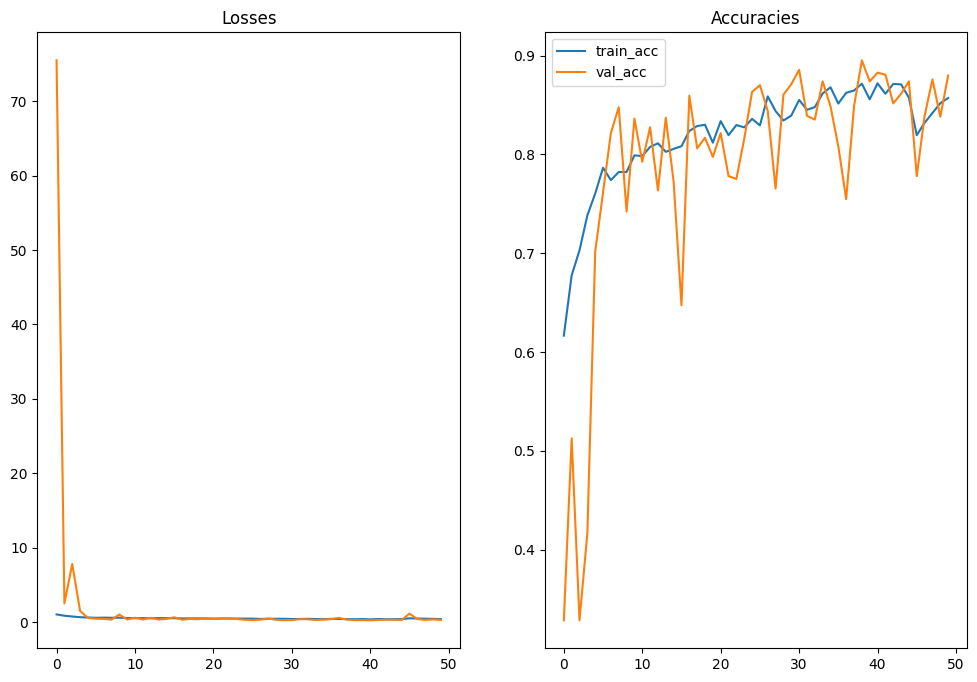

In [12]:
N = np.arange(0, NUM_EPOCHS)

plt.figure(figsize=(12,8))

plt.subplot(121)
plt.title("Losses")
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")

plt.subplot(122)
plt.title("Accuracies")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")


plt.legend()
plt.savefig("output/training_plot.png")

In [13]:
   # load the trained model from disk
print("[INFO] loading model...")
model = load_model('output/fire_detection.h5')

[INFO] loading model...


In [14]:
for i in range(50):
    random_index = np.random.randint(0,len(X_test))
    org_img = X_test[random_index]*255
    img = org_img.copy()
    img = cv2.resize(img,(128,128))
    img = img.astype('float32')/256
    pred = model.predict(np.expand_dims(img,axis=0))[0]
    result = classes[np.argmax(pred)]
    org_img = cv2.resize(org_img,(500,500))
    cv2.putText(org_img, result, (35, 50), cv2.FONT_HERSHEY_SIMPLEX,1.25, (0, 255, 0), 3)
    cv2.imwrite('output/testing/{}.png'.format(i),org_img)

1/1 [==============================] - 0s 50ms/step
